<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Introduccion_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Introducción a la clasificación de imágenes con redes neuronales convolucionales - Qué es el aprendizaje profundo (deep Learning)? 

![alt text](https://drive.google.com/uc?export=view&id=1Ib2sunEZFKfYP_jThatYleQuc7Tm7mFL)



## Procesado de imágenes básico: 

### Reading a grayscale image

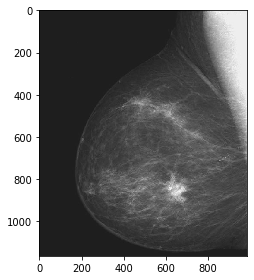

In [5]:
from skimage import io
I = io.imread('/content/gdrive/My Drive/data_course/image1.tif') # read image using imread function
io.imshow(I) # visualize image using imshow function
io.show() 

Check image size:

In [6]:
I.shape # Size of image in pixels

(1164, 984)

Access to origin pixel (top-left, DARK REGION) 

In [7]:
I[0,0] # Pixel value of first row, first column

38

Access to top-right region (LIGHT REGION)

In [8]:
I[0,983] # Pixel value of first row, last column

238

Digital encoding of the pixel grayscale levels: 

In [9]:
I.dtype

dtype('uint8')

'uint8' stands for *unsigned integer of 8 bits*, meaning that each pixel in the image is encoded with 8 bits representing an integer in the range [0,255]. In general, a n-bit grayscale image allows a range in levels from 0 to $2^n - 1$. 

### Represent pixels along a certain row: 

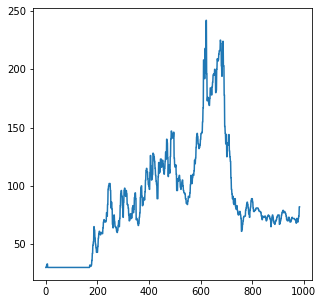

In [10]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

### Read a RGB color image:

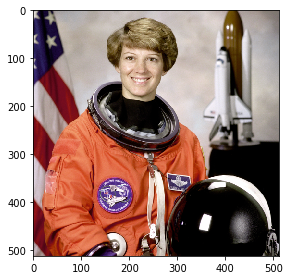

M = 512 columns, N = 512 rows, NC = 3 color channels


In [11]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Check image size:

In [12]:
IC.shape

(512, 512, 3)

### Convert color to grayscale:

$IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$


In [13]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

### Using colormaps

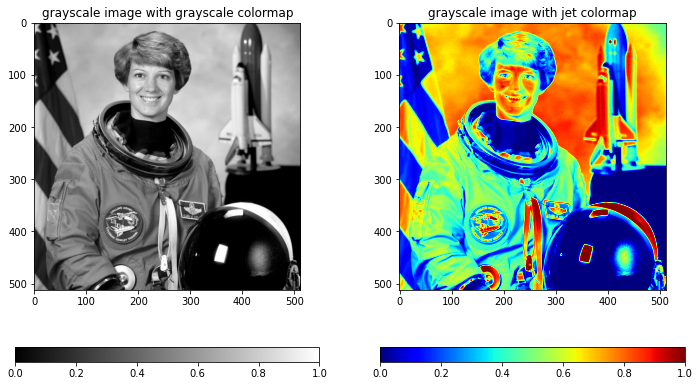

In [14]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 
im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a grayscale colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

### Convert image to different formats:
Convert an image to unsigned byte format, with values in [0, 255].


In [15]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

### Image histogram:

Distribution of pixel values, how many pixels are there in the image for each grayscale level? 


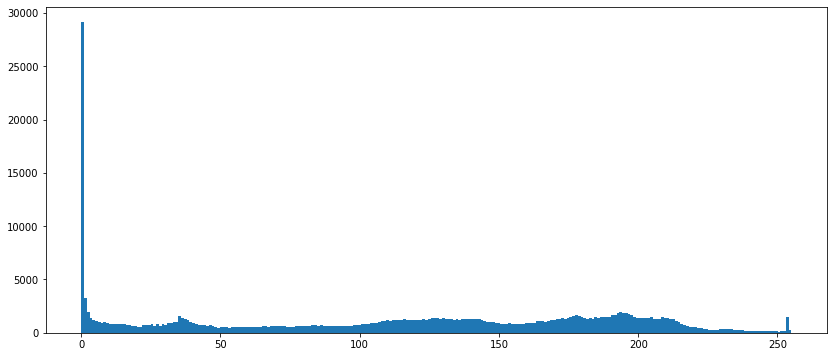

In [16]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

There are too many zeros in the image, take them out in order to properly visualize the distribution: 

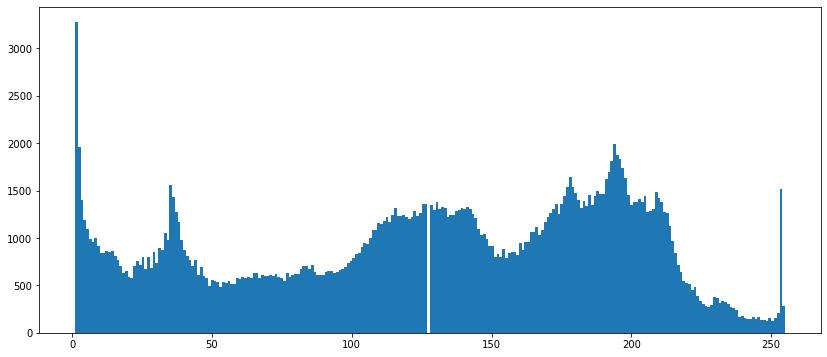

In [17]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

 Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

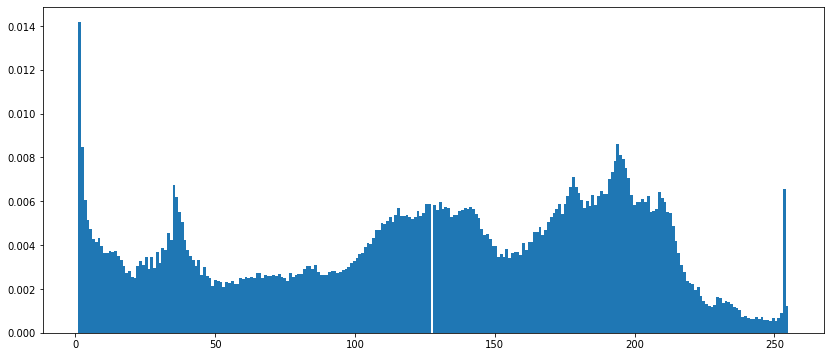

In [18]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

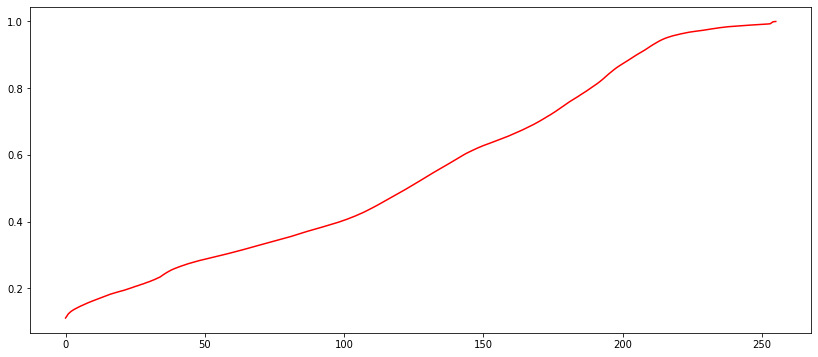

In [19]:
 from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5): 

In [20]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)
np.median(v)

123.0

### Filtrado de imágenes y convolución 2D

In [21]:
import numpy as np
from scipy import ndimage

# Imagen:
I = np.zeros((11,11))
I[5,5]=1

# Filtro: 
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

# convolucion 2D:
Iconvh = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconvh

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 2., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 4., 5., 6., 0., 0., 0., 0.],
       [0., 0., 0., 0., 7., 8., 9., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Aplicar la convolución para filtrar imágenes: Filtro de promedio local:

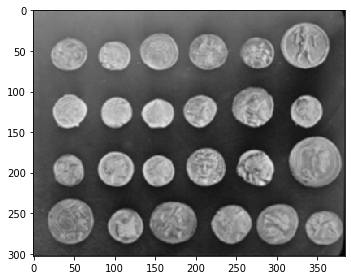

In [22]:
import numpy as np
from scipy import ndimage

# Imagen:
from skimage import data
I = data.coins()

# Filtro: 
h = (1/9)*np.ones((3,3))

# convolucion 2D:
Iconvh = ndimage.convolve(I, h, mode='constant', cval=0.0)

sk.io.imshow(Iconvh) # visualize image using imshow function
sk.io.show() 


Comparar la imagen original y la filtrada:

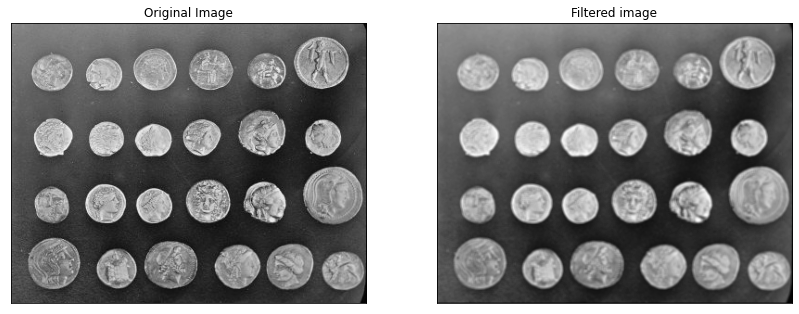

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Iconvh, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

## Ejemplo 1: Reconocimiento de dígitos escritos a mano: 

Example using the MNIST dataset of images of handwritten numbers: http://yann.lecun.com/exdb/mnist/

In [39]:
# Load MNIST database and Keras libraries:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last') #(batch, height, width, channels)


# Set the seed of the random number generator to ensure reproducibility of the results:
seed = 7
numpy.random.seed(seed)

# Define training and test data: images+class labels
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the images as vectors: 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')#(batch, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')#(batch, height, width, channels)

# Normalize grayscale images 0-255 into values between from 0-1:
X_train = X_train / 255
X_test = X_test / 255

# Encode class labels in categorical vector format with ten positions: 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test1.shape[1]

mirar las dimensiones de las imágenes y de los conjuntos de entrenamiento y test:

In [40]:
print('Las dimensiones de X_train son {}'.format(X_train.shape))
print('Las imágenes son de un tamaño {} x {}'.format(X_train[0].shape[1],X_train[0].shape[1]))
print('El número de imágenes del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('El número de imágenes del conjunto de test es {}'.format(X_test.shape[0]))

Las dimensiones de X_train son (60000, 28, 28, 1)
Las imágenes son de un tamaño 28 x 28
El número de imágenes del conjunto de entrenamiento es 60000
El número de imágenes del conjunto de test es 10000



### Define the architecture of the Convolutional Neural Network:


In [41]:
def baseline_model():
# First layer (Input):
	model = Sequential() 
# Second layer (Convolucional):
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu')) 	
# Third layer (pooling):
	model.add(MaxPooling2D(pool_size=(2, 2))) 
# Fourth layer (regularization)
	model.add(Dropout(0.2))
# Fifth layer (Reshape, flatten): 
	model.add(Flatten())
# Sixth layer (fully connected)
	model.add(Dense(128, activation='relu',name='f')) 
# Seventh layer (output, softmax):
	model.add(Dense(num_classes, activation='softmax')) 
# Compile the model and specify optimization method and performance metrics:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
model.summary()



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
 - 30s - loss: 0.2481 - accuracy: 0.9303 - val_loss: 0.0837 - val_accuracy: 0.9746
Epoch 2/3
 - 30s - loss: 0.0764 - accuracy: 0.9771 - val_loss: 0.0493 - val_accuracy: 0.9845
Epoch 3/3
 - 30s - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0420 - val_accuracy: 0.9864
Accuracy of the model: 98.64%


Entrenemos el modelo:

In [ ]:

# Model instantiation: 
model = baseline_model()
# Adjust the model parameters using the training and test data:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200, verbose=2)

# Evaluation of the model using the test data:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy of the model: %.2f%%" % (100*scores[1]))


### How to use the CNN as Feature Extractor and classify images using a SVM

Define a new model by setting the output of the previous CNN just before the classification layers: Let's use this model to extract features



In [49]:
model.input

<tf.Tensor 'conv2d_6_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [48]:
X_train.shape

(60000, 28, 28, 1)

In [50]:
from keras.models import Model
from sklearn.svm import SVC

model1 = Model(inputs=model.input, outputs=model.get_layer('f').output)

# Extract the training CNN features by projecting the training data using the new model
X_train_cnn = model1.predict(X_train)

Tamaño de los atributos extraídos:

In [51]:
X_train_cnn.shape

(60000, 128)

Ahora entrenamos una SVM con los atributos que hemos extrído de cada imagen:

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Train a SVM with the CNN features:

# convert class labels as an array of integers:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)


clf2 = SVC(kernel='linear', class_weight='balanced')
clf2 = clf2.fit(X_train_cnn, y_train1)
print("Predicting people's names on the test set")
X_test_cnn = model1.predict(X_test)
y_pred2 = clf2.predict(X_test_cnn)

print(confusion_matrix(y_test1, y_pred2))
print('Accuracy ={}'.format(accuracy_score(y_test1, y_pred2)))


Predicting people's names on the test set
[[ 973    0    0    0    0    1    1    1    2    2]
 [   0 1128    2    0    0    0    2    1    2    0]
 [   1    1 1018    2    3    0    0    3    4    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   1    0    0    0  975    0    0    0    2    4]
 [   1    0    0    6    0  880    4    0    1    0]
 [   6    2    0    0    3    5  940    0    2    0]
 [   0    0    5    1    0    0    0 1018    1    3]
 [   3    0    1    5    1    1    0    1  962    0]
 [   1    1    2    3    5    3    0    3    2  989]]
Accuracy =0.989


## Ejemplo 2: Clasificación de imágenes:

### Load the data:

Load CIFAR10 data from Keras tensorflow built-in datasets:

https://www.tensorflow.org/datasets/catalog/cifar10

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
import numpy as np

import os

num_classes = 10
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Have it as an array of integers:
y_test1 = np.argmax(y_test,axis=1)
y_train1 = np.argmax(y_train,axis=1)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### Represent first image of each class in the training set:

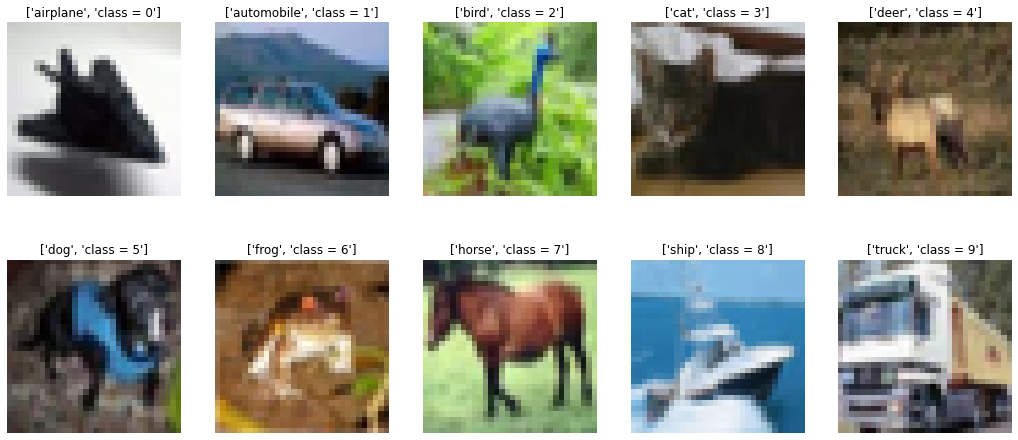

In [2]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train1==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]]) 
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

### Represent 10 images from the 'ship' class randomly selected from the training set and describe the observed differences and similarities:

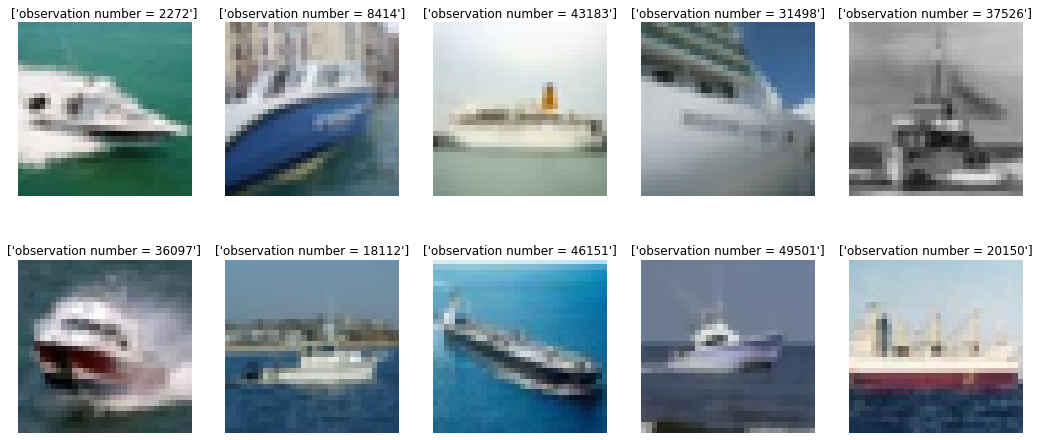

In [3]:
import numpy as np

ind_ship = np.squeeze(np.where(y_train1==8))
vrandom = np.random.choice(ind_ship, size=10,replace=False)  

fig = plt.figure(figsize=(18, 8))
cnt = 0
for kship in vrandom:
    ax = fig.add_subplot(2, 5, cnt+1)
    ax.imshow(x_train[kship]) 
    ax.set_title(['observation number = {}'.format(kship)])
    ax.axis('off')
    cnt = cnt+1 

Most ship images contain a background with either water or sky, but the color of the water is rather different in each observation. The colors of the ships can also ve very heterogeneous, ranging from red to yellow to white. 

### Training a custom CNN


Execute the example with a custom CNN for both feature extraction and classification: 

Get the results in the case of not having aumented data whd using batch_size = 32
epochs = 2


https://keras.io/examples/cifar10_cnn/

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax',name='visualize_this'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

### Train the model with training subset:

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

batch_size = 32
epochs = 1

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 243s 5ms/step - loss: 1.8259 - accuracy: 0.3309 - val_loss: 1.5395 - val_accuracy: 0.4406


CPU time is around 297 seconds per epoch. The model has a total of 1,250,858 parameters.

Save model parameters after training:

In [ ]:
# model.save_weights("model.h5")

### Número de parámetros entrenables de una CNN: 

The number of parameters a convolutional layer with N kernels of size mxm can be computed as:

Total number of parameters = Number of kernel coefficients + Number of bias coefficients, where 

- Number of kernel coefficients = (N kernels) * ($m^2$ coefficients per kernel) * (NC of channels of the kernel inputs)
- Number of bias coefficients: 1 bias (constant value) added to each kernel = N bias

For instance, in the first convolutional layer conv2d_1, we have N = 32 kernels, each one of size 3x3 (m=3) and the input has NC=3 color channels. Therefore the number of parameters is $32*3^2*3+32 = 896$

Similarly, the second convolutional layer conv2d_2 in the CNN have N=32 kernels of size 3x3 (m=3) but the input now is NC=32, therefore the number of paramenters is given by: 

conv2d_2 (N=32, m=3, NC=32): $32*3^2*32+32 = 9248$

Applying the same procedure, the following inner convolutional layers have the parameters:

conv2d_3 (N=32, m=3, NC=64): $64*3^23*32+64 = 18496$

conv2d_4 (N=64, m=3, NC=64): $64*3^2*64+64 = 36928$

### Evaluate performace with the test subset:

In [7]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred,axis=1)

cm = confusion_matrix(y_test1, y_pred1)

print(cm)
print(classification_report(y_test1, y_pred1))

10000/10000 [==============================] - 11s 1ms/step
Test loss: 1.539541681289673
Test accuracy: 0.4406000077724457
[[398  89  26  16  17  21  20  36 271 106]
 [ 14 666   0   7   3   3  17  21  64 205]
 [ 65  54 110  62 252  83 166 110  63  35]
 [ 18  43  37 158  79 163 269 115  25  93]
 [ 36  29  36  46 372  65 209 137  32  38]
 [  8  34  32 107 104 323 161 146  34  51]
 [  3  32  15  38 122  26 634  54   9  67]
 [ 13  52  10  40  66  78  89 518  23 111]
 [ 74 104   7  18   4  16  15  10 638 114]
 [ 19 217   4  11   4   7  41  27  81 589]]
              precision    recall  f1-score   support

           0       0.61      0.40      0.48      1000
           1       0.50      0.67      0.57      1000
           2       0.40      0.11      0.17      1000
           3       0.31      0.16      0.21      1000
           4       0.36      0.37      0.37      1000
           5       0.41      0.32      0.36      1000
           6       0.39      0.63      0.48      1000
           7 

Best recognition results are obtained for the class '8:ship'. Worst results are for class '3:cat'. 
Inspecting the confusion matrix, the highest confusion is that 207 observations from class '0:airplane' are erroneously assigned to class '8:ship'. Perhaps due to the presence of a blue background (sky or sea). Note that surprinsignly only 97 ships have been erroneously assigned to airplanes. It seems that it is easier to recognize ships than airplanes. 


### Trabajando con arquitecturas CNN predefinidas


Create a model using VGG16 architecture but adapting the shape of the input to the size of the images of the CIFAR-10 dataset. Use the Keras’ function Model (https://keras.io/models/model/ ) specifying the parameters include_top = True, weights=None, input_tensor = None, input_shape = (32,32,3) and classes = 10. Provide a summary of the resulting architecture and describe the main differences with the model used in exercise 1. 

In [8]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

modelc = VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(32,32,3), pooling=None, classes=10)
modelc.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

The VGG16 model has a total of 13 convolutional layers, many more than the original custom model.
The number of parameters of the VGG16 model is much larger too: 33,638,218 vs 1,250,858 parameters, 26 times more parameters! 

In [77]:
print('Fraction of Increase in number of parameters VGG16/custom models ={}'.format(33638218/1250858))

Fraction of Increase in number of parameters VGG16/custom models =26.892115651816592


### Train the predefined CNN architecture:

Train the model using the training data and evaluate with the test set (batch_size = 32 and epochs = 2):

In [9]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelc.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

batch_size = 32
epochs = 2

modelc.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

#modelc.save_weights("modelc.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
 4096/50000 [=>............................] - ETA: 1:20:40 - loss: 2.3040 - accuracy: 0.1125

KeyboardInterrupt: ignored

It becomes evident that 2 epochs is clearly insufficient to train the model. 

In [ ]:
scores = modelc.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_pred = modelc.predict(x_test)
y_pred1 = np.argmax(y_pred,axis=1)
cmb = confusion_matrix(y_test1, y_pred1)

print(cmb)
print(classification_report(y_test1, y_pred1))

All the observations have been assigned to classes 3 and 4. 

### Transfer learning 

Cómo utilizar las CNN sin necesidad de entrenarlas

Apply the VGG16 pre-trained with the imagenet dataset to extract features and classify using a Support Vector Machine: 

In [10]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

modeld = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))

58892288/58889256 [==============================] - 0s 0us/step


Extract features

In [11]:
featd_test = modeld.predict(x_test)
featd_train = modeld.predict(x_train)

Fit a SVC that classifies using the extracted features:

In [82]:
from keras.models import Model
from sklearn.svm import SVC

clf2 = SVC(kernel='linear', class_weight='balanced',gamma=0.001)

dd = np.squeeze(featd_train)
clf2 = clf2.fit(dd, y_train1)
feat1_test = np.squeeze(featd_test)

In [83]:
ddtest = np.squeeze(featd_test)
y_pred2 = clf2.predict(ddtest)
print(classification_report(y_test1, y_pred2))
print(confusion_matrix(y_test1, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1000
           1       0.64      0.67      0.65      1000
           2       0.51      0.48      0.49      1000
           3       0.43      0.44      0.44      1000
           4       0.55      0.54      0.55      1000
           5       0.54      0.49      0.52      1000
           6       0.62      0.68      0.65      1000
           7       0.67      0.63      0.65      1000
           8       0.70      0.70      0.70      1000
           9       0.62      0.60      0.61      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000

[[676  32  63  20  12  15  10  24 115  33]
 [ 46 672  17  31  14  24  23  16  42 115]
 [ 86  20 483  76 113  65  94  36  13  14]
 [ 26  44  80 443  55 132 110  37  23  50]
 [ 31  10  91  72 544  31  91  86  29  15]
 [ 17  29  76 178  65 489 

Results are rather poor: 
- class 1 gets confused all around, with only 79/1000 instances correcly classified as class 1 
- Class 9 is the one with best performace, since we correctly classify 669/1000 instances
- Class 7 is the worst, we only get 41/1000 correctly classified

Conclusion: It is generally better to have a simpler model with proper training than a very complex architecture with a training that doesn't get the best features for our problem. 



Más información y detalles sobre la implementación con las librerías Keras:

https://keras.io/api/applications/

https://keras.io/examples/

https://keras.io/examples/vision/image_classification_from_scratch/

https://keras.io/examples/vision/mnist_convnet/



## Ejemplo 3: Reconocomiento de caras

Try now with the image database Labeled Faces in the Wild: http://vis-www.cs.umass.edu/lfw/

It is also included as a dataset in the sklearn libraries:

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

lfw_people = fetch_lfw_people(min_faces_per_person=200,  funneled=True,resize=1)
# Load images:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
# Get class labels: 
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Define training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Now the shape of data is 

In [19]:
X_train1.shape

(536, 1, 125, 94)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

###########################
# Cargar librerias Keras:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last') #(batch, height, width, channels)


# Establecer la semilla del generador de numeros aleatorios para garantizar reproducibilidad de los resultados 
seed = 7
numpy.random.seed(seed)

# Dimensionar las imagenes en vectores 
X_train1 = X_train.reshape(X_train.shape[0], 125, 94,1).astype('float32')
X_test1 = X_test.reshape(X_test.shape[0], 125, 94,1).astype('float32')

# Normalizar las imagenes de escala de grises 0-255 (valores entre 0-1):
X_train1 = X_train1 / 255
X_test1 = X_test1 / 255

# Codificar las etiquetas de clase en formato de vectores categoricos con diez posiciones: 
y_train1 = np_utils.to_categorical(y_train)
y_test1 = np_utils.to_categorical(y_test)
num_classes = y_test1.shape[1]

# Funcion en la que se define la arquitectura del modelo:
def baseline_model():
# Capa de entrada:
	model = Sequential() 
# Primera capa (Convolucional):
	model.add(Conv2D(32, (5, 5), input_shape=(125, 94,1), activation='relu')) 	
# Tercera capa (agrupamiento):
	model.add(MaxPooling2D(pool_size=(2, 2))) 
# Cuarta capa (regularizacion)
	model.add(Dropout(0.2))
# Quinta capa (redimensionamiento): 
	model.add(Flatten())
# Sexta capa (completamente conectada)
	model.add(Dense(128, activation='relu',name='f')) 
# Capa de salida (softmax):
	model.add(Dense(num_classes, activation='softmax')) 
# Compilar el modelo y especificar metodo y metrica de optimizacion:
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# Llamada al modelo: 
model = baseline_model()

# Ajustar el modelo utilizando los datos de entrenamiento y validacion con los de test:
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=3, batch_size=200, verbose=2)

# Evaluacion del modelo utilizando los datos de test:
scores1 = model.evaluate(X_test1, y_test1, verbose=0)
print("Exactitud del modelo: %.2f%%" % (100*scores1[1]))
#
y_pred1 = model.predict(X_test1)

# Evaluation of the model using the test data:
scores = model.evaluate(X_test1, y_test1, verbose=0)
print("Accuracy of the model: %.2f%%" % (100*scores[1]))

Train on 536 samples, validate on 230 samples
Epoch 1/3
 - 5s - loss: 7.1032 - accuracy: 0.5896 - val_loss: 0.7715 - val_accuracy: 0.6913
Epoch 2/3
 - 5s - loss: 0.9159 - accuracy: 0.4422 - val_loss: 0.6792 - val_accuracy: 0.6913
Epoch 3/3
 - 5s - loss: 0.6426 - accuracy: 0.6922 - val_loss: 0.6754 - val_accuracy: 0.6913
Exactitud del modelo: 69.13%
Accuracy of the model: 69.13%


In [27]:

############################################################
### EJERCICIO 3: CNN as FE + SVM
############################################################
from keras.models import Model

# Aplicar nomes les capes de extraccio d'atributs:
model1 = Model(inputs=model.input, outputs=model.get_layer('f').output)
X_train_cnn = model1.predict(X_train1)

clf2 = SVC(kernel='linear', class_weight='balanced')
clf2 = clf2.fit(X_train_cnn, y_train)

print("Predicting people's names on the test set")
X_test_cnn = model1.predict(X_test1)
y_pred2 = clf2.predict(X_test_cnn)
print(classification_report(y_test, y_pred2, target_names=target_names))
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2, normalize=True, sample_weight=None))

from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(clf2, X_test_cnn, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))


Predicting people's names on the test set
               precision    recall  f1-score   support

 Colin Powell       0.63      0.70      0.67        71
George W Bush       0.86      0.82      0.84       159

     accuracy                           0.78       230
    macro avg       0.75      0.76      0.75       230
 weighted avg       0.79      0.78      0.79       230

[[ 50  21]
 [ 29 130]]
0.782608695652174
Accuracy: 0.77 (+/- 0.08)
